**Team 10**
1. Kishore 
2. Shruthi
3. Suhas
4. Sujan
5. Yashovardhan

# CONVOLUTIONAL NEURALNETWORKS FOR CLASSIFICATION OF CAR MODELS (TRANSFERLEARNING|DEPLOYMENT)

<img src="car_all.png">

## Problem Statement:

Classification of images of the cars to their respective labels using Deep Learning Techniques.

**Class Labels:**
1. Creta
2. Innova
3. Nano
4. Scorpio
5. Range Rover
6. Mini Cooper
7. Mahindra thar
8. Hyundai i20
9. MG Hector
10. Ford EcoSport
11. Maruti Vitara Brezza
12. Maruti Eeco
13. Maruti Baleno
14. Hyundai Santro
15. Mahindra Bolero
16. Renault Duster
17. Hyundai venue
18. Maruti swift

## Project Pipeline/Work Flow:

1. **Data Collection**<br>
2. **Image Visualization with their class labels**<br>
3. **Model Building**
        3.1 Base Model(CNN Based)
        3.2 Model 1(CNN + Image Augmentation)
        3.3 Model 2(CNN +Image Augmentation + Batch Normalization)
        3.4 Model 3(CNN + Image Augmentation + Drop Out)
        3.5 Final Model(Transfer Learning + callbacks)
4. **Visualize the predictions**<br>
5. **Analysis of the accuracy and loss of all the models built**<br>

## 1. Data Collection

We have scraped the images belonging to 5 classes of cars using a python package **"Bing Image Downloader"** which is an open-source library of pypi. Link: https://pypi.org/project/bing-image-downloader/

**Installation:**

pip install bing-image-downloader

**Usage:**

from bing_image_downloader import downloader<br>

downloader.download(query_string, limit=100,  output_dir='dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

**Arguments:**

query_string : String to be searched.<br>
limit : (optional, default is 100) Number of images to download.<br>
output_dir : (optional, default is 'dataset') Name of output dir.<br>
adult_filter_off : (optional, default is True) Enable of disable adult filteration.<br>
force_replace : (optional, default is False) Delete folder if present and start a fresh download.<br>
timeout : (optional, default is 60) timeout for connection in seconds.<br>
verbose : (optional, default is True) Enable downloaded message.



**Challenge Faced:** Most of the downloads from the Bing Image Downloader were of "JPG" format which our models failed to recognize as a proper image format. We had to change all the JPG to PNG using the below code.

**Other Web Scraping libraries available:**<br>
    1. Google Chrome extension(Download all images)<br>
    2. Google Image Downloader(pypi)    

## Import Libraries

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,CSVLogger
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image
from matplotlib.pyplot import rcParams
import cv2
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import load_model
from tensorflow.keras import regularizers, optimizers
import gradio as gr
import tensorflow as tf 
import numpy as np
import requests
from tensorflow.keras.models import load_model

## Data path

In [4]:
data_folder = "C:\\Users\\Kishore1\\Downloads\\Indian Cars\\converted\\"

In [5]:
train = tf.keras.preprocessing.image_dataset_from_directory(data_folder,validation_split=0.2,subset="training",
                                                            seed=100,image_size=(224, 224),batch_size=32)

Found 1073 files belonging to 18 classes.
Using 859 files for training.


In [6]:
valid = tf.keras.preprocessing.image_dataset_from_directory(data_folder,validation_split=0.2,subset="validation",
                                                            seed=100,image_size=(224, 224),batch_size=32)

Found 1073 files belonging to 18 classes.
Using 214 files for validation.


## Class Names

In [7]:
class_names = train.class_names
print(class_names)

['Creta', 'Ford EcoSport', 'Hyundai Santro', 'Innova', 'MG Hector', 'Mahindra Bolero', 'Maruti Baleno', 'Maruti Eeco', 'Maruti Vitara Brezza', 'Nano', 'Range Rover', 'Renault Duster', 'Scorpio', 'hyundai i20', 'hyundai venue', 'mahindra thar', 'maruti swift', 'mini cooper']


## 2. Image Visualization with their class labels

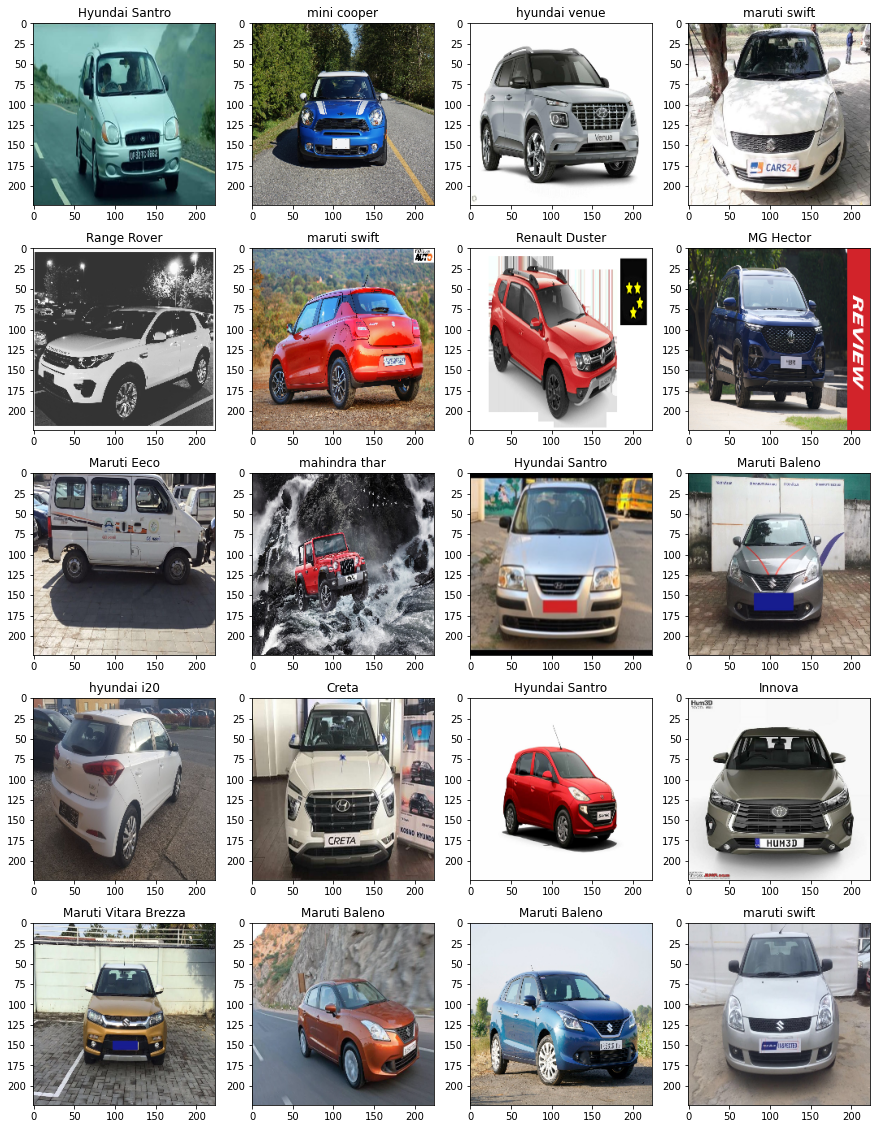

In [8]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(20):
        plt.subplot(5, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])

## User-Defined function to plot the performance

In [10]:
def plot_performance(model_history):
    plt.figure(figsize=(15, 5))
    plt.subplot(1,2,1)
    plt.grid(True)
    plt.plot(model_history.history['accuracy'], 'r', label='train_acc')
    plt.plot(model_history.history['val_accuracy'], 'g', label='val_acc')
    plt.legend()
    plt.title("Train-Validation accuracy vs Epochs")    
    plt.subplot(1,2,2)
    plt.grid(True)
    plt.plot(model_history.history['loss'], 'r--', label='train_loss')
    plt.plot(model_history.history['val_loss'], 'g--', label='val_loss')
    plt.title("Train-Validation Loss vs Epochs")
    plt.legend()
    plt.show()

## 3. Model Development

## 3.1 Base Model(CNN Based)

A Sequential model with 2 layers of Con2D and maxpool2D and an output dense layer.

In [11]:
model = Sequential()

# Convolution + Maxpool2D Layer 
model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(3,3))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())

# Output layer
model.add(Dense(18,activation = 'softmax'))

# Complile the model
model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=["accuracy"])

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 18)                373266    
Total params: 378,786
Trainable params: 378,786
Non-trainable params: 0
__________________________________________________

In [12]:
# Fit the model and run for 30 iterations

hist = model.fit(train,validation_data=valid,epochs=30,verbose=2,batch_size=8)

Epoch 1/30
27/27 - 48s - loss: 16.9686 - accuracy: 0.1001 - val_loss: 2.8113 - val_accuracy: 0.1449
Epoch 2/30
27/27 - 42s - loss: 1.8011 - accuracy: 0.5087 - val_loss: 3.4377 - val_accuracy: 0.2383
Epoch 3/30
27/27 - 41s - loss: 0.4602 - accuracy: 0.8708 - val_loss: 3.5279 - val_accuracy: 0.3318
Epoch 4/30
27/27 - 41s - loss: 0.0620 - accuracy: 0.9895 - val_loss: 4.4511 - val_accuracy: 0.2991
Epoch 5/30
27/27 - 41s - loss: 0.0196 - accuracy: 0.9988 - val_loss: 7.1552 - val_accuracy: 0.3224
Epoch 6/30
27/27 - 42s - loss: 0.0035 - accuracy: 0.9988 - val_loss: 5.9853 - val_accuracy: 0.2944
Epoch 7/30
27/27 - 41s - loss: 9.5156e-04 - accuracy: 1.0000 - val_loss: 6.5356 - val_accuracy: 0.2944
Epoch 8/30
27/27 - 38s - loss: 3.5984e-04 - accuracy: 1.0000 - val_loss: 6.7421 - val_accuracy: 0.2944
Epoch 9/30
27/27 - 39s - loss: 2.5615e-04 - accuracy: 1.0000 - val_loss: 6.9463 - val_accuracy: 0.3037
Epoch 10/30
27/27 - 42s - loss: 2.0303e-04 - accuracy: 1.0000 - val_loss: 7.0690 - val_accuracy:

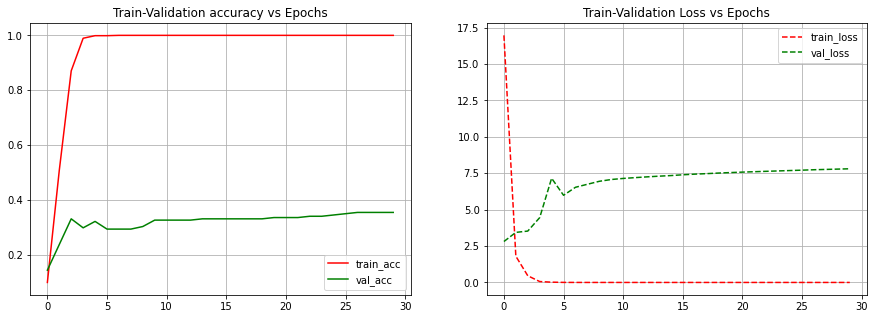

In [13]:
# Analyse the model performance

plot_performance(model.history)

**Observations:**
    
1. Base model is severely overfitted on the train data.
2. Loss does not seem to be reducing after a few initial epoch and remains constant since then.
3. Train accuracy reaches 100% after just 5 epochs shows the degree of overfittng.

**Steps to handle overfitting:**

1. Use of Image Augmentation to make the model learn of the different versions of the training data.
2. Use of L1/L2 regularization, Drop out, Batch Normalization.
3. Use of callbacks such as Early Stopping.
4. Varying the learning rate of the optimizer.

##  3.2 Model 1(CNN + Image Augmentation)

In [14]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  validation_split=0.2, 
                                  horizontal_flip=True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [16]:
image_shape=(224,224,3)
train_data=train_datagen.flow_from_directory(data_folder,subset="training",
                                         target_size=image_shape[:2],
                                         class_mode = 'categorical',
                                         batch_size=5,shuffle=True)

Found 865 images belonging to 18 classes.


In [17]:
val_data=test_datagen.flow_from_directory(data_folder,
                                       subset="validation",
                                       target_size=image_shape[:2],
                                       class_mode = 'categorical',
                                       batch_size=5,shuffle=True)

Found 208 images belonging to 18 classes.


In [18]:
model1 = Sequential()

model1.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model1.add(MaxPooling2D(3,3))
model1.add(Conv2D(16,(3,3),activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Flatten())

model1.add(Dense(18,activation = 'softmax'))

model1.compile(optimizer="adam",loss='categorical_crossentropy',metrics=["accuracy"])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 18)                373266    
Total params: 378,786
Trainable params: 378,786
Non-trainable params: 0
________________________________________________

In [19]:
hist_1 = model1.fit(
  train_data,
  validation_data=val_data,
  epochs=30,
  verbose=2,
  batch_size=5,
  steps_per_epoch=len(train_data),
  validation_steps=len(val_data)
)

Epoch 1/30
173/173 - 69s - loss: 2.9077 - accuracy: 0.0682 - val_loss: 2.9229 - val_accuracy: 0.0817
Epoch 2/30
173/173 - 71s - loss: 2.8279 - accuracy: 0.1249 - val_loss: 2.7958 - val_accuracy: 0.1442
Epoch 3/30
173/173 - 68s - loss: 2.6487 - accuracy: 0.1884 - val_loss: 2.7708 - val_accuracy: 0.1683
Epoch 4/30
173/173 - 72s - loss: 2.4307 - accuracy: 0.2659 - val_loss: 2.8041 - val_accuracy: 0.2260
Epoch 5/30
173/173 - 71s - loss: 2.1063 - accuracy: 0.3607 - val_loss: 2.9184 - val_accuracy: 0.1923
Epoch 6/30
173/173 - 68s - loss: 1.9791 - accuracy: 0.4116 - val_loss: 2.9175 - val_accuracy: 0.2356
Epoch 7/30
173/173 - 76s - loss: 1.8439 - accuracy: 0.4532 - val_loss: 2.9545 - val_accuracy: 0.2740
Epoch 8/30
173/173 - 68s - loss: 1.7223 - accuracy: 0.4867 - val_loss: 3.1605 - val_accuracy: 0.2740
Epoch 9/30
173/173 - 68s - loss: 1.6123 - accuracy: 0.5075 - val_loss: 2.8615 - val_accuracy: 0.2837
Epoch 10/30
173/173 - 68s - loss: 1.5061 - accuracy: 0.5549 - val_loss: 3.6065 - val_accura

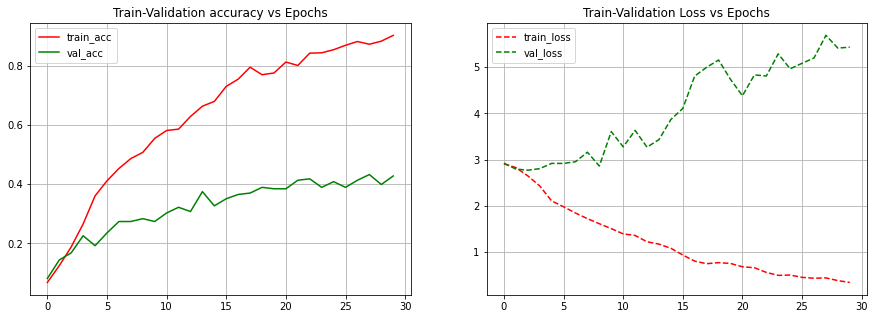

In [20]:
plot_performance(model1.history)

**Observation:**

1. Although, there is overfitting on the train, the difference between the train and test accuracy is reduced.
2. The loss of validation seems to be fluctuating hence is its accuracy.
3. Train loss shows a smooth downwards trend.

##  3.3 Model 2(CNN +Image Augmentation + Batch Normalization)

In [21]:
model2 = Sequential(name='Batch_Normalization')
model2.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model2.add(MaxPool2D(pool_size=2, strides=2))
model2.add(BatchNormalization())

model2.add(Flatten())

model2.add(Dense(units=512, activation='relu'))
model2.add(Dense(units=256, activation='relu'))
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=18, activation='sigmoid'))
print(model2.summary())

Model: "Batch_Normalization"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 111, 111, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 54, 54, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 32)

In [22]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


hist_2 = model2.fit_generator(train_data,
                             epochs=30,
                             verbose=2,
                             steps_per_epoch=len(train_data),
                             validation_data=val_data,
                             validation_steps=len(val_data))

Epoch 1/30
173/173 - 98s - loss: 3.3436 - accuracy: 0.0890 - val_loss: 3.4477 - val_accuracy: 0.0865
Epoch 2/30
173/173 - 96s - loss: 2.9024 - accuracy: 0.0913 - val_loss: 3.0284 - val_accuracy: 0.1010
Epoch 3/30
173/173 - 96s - loss: 2.8194 - accuracy: 0.1098 - val_loss: 2.7646 - val_accuracy: 0.1346
Epoch 4/30
173/173 - 96s - loss: 2.7616 - accuracy: 0.1364 - val_loss: 2.8355 - val_accuracy: 0.1202
Epoch 5/30
173/173 - 96s - loss: 2.7170 - accuracy: 0.1480 - val_loss: 2.8734 - val_accuracy: 0.1106
Epoch 6/30
173/173 - 95s - loss: 2.6901 - accuracy: 0.1538 - val_loss: 2.6780 - val_accuracy: 0.1779
Epoch 7/30
173/173 - 97s - loss: 2.6088 - accuracy: 0.1746 - val_loss: 2.5997 - val_accuracy: 0.1923
Epoch 8/30
173/173 - 96s - loss: 2.5685 - accuracy: 0.1919 - val_loss: 2.7595 - val_accuracy: 0.1779
Epoch 9/30
173/173 - 96s - loss: 2.5622 - accuracy: 0.1873 - val_loss: 2.9045 - val_accuracy: 0.1106
Epoch 10/30
173/173 - 103s - loss: 2.5840 - accuracy: 0.1723 - val_loss: 2.6876 - val_accur

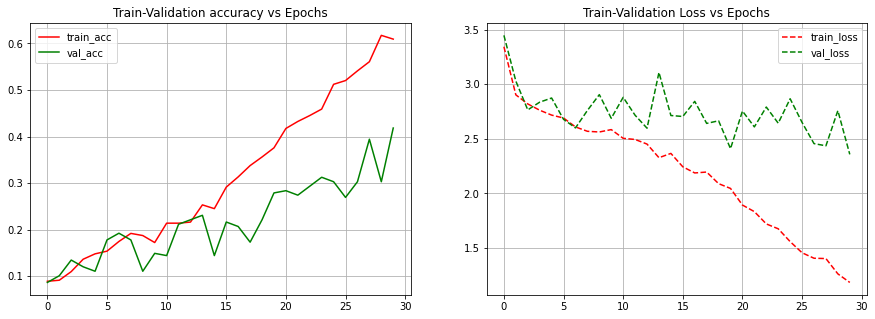

In [23]:
plot_performance(model2.history)

**Observation:**

1. Although, there is overfitting on the train, the difference between the train and test accuracy is furthermore reduced.
2. The loss of validation seems to be fluctuating hence is its accuracy.
3. Train loss shows a smooth downwards trend.

## 3.4 Model 3(CNN + Image Augmentation + Drop Out)

In [24]:
model3 = Sequential(name='Dropout')
model3.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=image_shape))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model3.add(MaxPool2D(pool_size=2, strides=2))
model3.add(Dropout(0.3))

model3.add(Flatten())

model3.add(Dense(units=512, activation='relu'))
model3.add(Dense(units=256, activation='relu'))
model3.add(Dense(units=128, activation='relu'))
model3.add(Dense(units=18, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 18)                373266    
Total params: 378,786
Trainable params: 378,786
Non-trainable params: 0
__________________________________________________

In [25]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


hist_3 = model3.fit_generator(train_data,
                             epochs=30,
                             verbose=2,
                             steps_per_epoch=len(train_data),
                             validation_data=val_data,
                             validation_steps=len(val_data))

Epoch 1/30
173/173 - 111s - loss: 2.9243 - accuracy: 0.0601 - val_loss: 2.8765 - val_accuracy: 0.0769
Epoch 2/30
173/173 - 116s - loss: 2.8745 - accuracy: 0.0705 - val_loss: 2.8662 - val_accuracy: 0.0817
Epoch 3/30
173/173 - 112s - loss: 2.8751 - accuracy: 0.0751 - val_loss: 2.8625 - val_accuracy: 0.0817
Epoch 4/30
173/173 - 102s - loss: 2.8750 - accuracy: 0.0694 - val_loss: 2.8623 - val_accuracy: 0.0817
Epoch 5/30
173/173 - 104s - loss: 2.8707 - accuracy: 0.0636 - val_loss: 2.8623 - val_accuracy: 0.0817
Epoch 6/30
173/173 - 106s - loss: 2.8704 - accuracy: 0.0717 - val_loss: 2.8620 - val_accuracy: 0.0817
Epoch 7/30
173/173 - 108s - loss: 2.8707 - accuracy: 0.0647 - val_loss: 2.8640 - val_accuracy: 0.0721
Epoch 8/30
173/173 - 107s - loss: 2.8712 - accuracy: 0.0705 - val_loss: 2.8614 - val_accuracy: 0.0817
Epoch 9/30
173/173 - 104s - loss: 2.8700 - accuracy: 0.0728 - val_loss: 2.8647 - val_accuracy: 0.0817
Epoch 10/30
173/173 - 108s - loss: 2.8738 - accuracy: 0.0740 - val_loss: 2.8635 - 

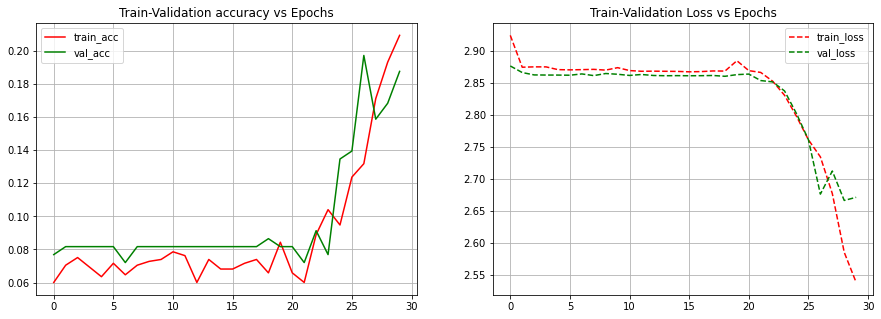

In [26]:
plot_performance(model3.history)

**Observation:**

1. Although, there is overfitting on the train, the difference between the train and test accuracy is reduced.
2. The loss of validation seems to be fluctuating hence is its accuracy.
3. Train loss shows a smooth downwards trend.

## 3.5 Final Model(Transfer Learning + callbacks)

**Steps taken to arrive at the best and final model:**

1. Use of pre-trined weights from MobileNet for the 70 convolutional layers.
2. Open up covolutional layers from 71st layer to train with a dense hidden layer of 512 neurons.
3. These layers account for optimization of weights through backpropagation.
4. Use of GlobalAveragePooling2D.
5. Use of "sgd" optimizer.
6. Use of callbacks(EarlyStopping, ModelCheckpoint, CSVLogger).

In [36]:
base_model=tf.keras.applications.MobileNet(input_shape=image_shape,include_top=False)

base_model.trainable=False

for layer in base_model.layers[71:]:
    layer.trainable=True

model_final=Sequential([base_model,
                          GlobalAveragePooling2D(),
                          Dense(512,activation='relu'),
                          Dense(18,activation='softmax')])

model_final.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=30)
check_point=ModelCheckpoint('C:/Users/Kishore1/Downloads/Indian cars/Model_weights/model.{epoch:02d}-{val_loss:.2f}.h5',)
csv_logger = CSVLogger('C:/Users/Kishore1/Downloads/cars new/training.log')
model_final.fit_generator(train_data,epochs=30,steps_per_epoch=len(train_data),validation_data=val_data,
                              validation_steps=len(val_data),verbose=2,
                               callbacks=[early_stop,check_point,csv_logger])

Epoch 1/30
173/173 - 96s - loss: 2.6657 - accuracy: 0.1931 - val_loss: 2.0688 - val_accuracy: 0.3558
Epoch 2/30
173/173 - 84s - loss: 1.8312 - accuracy: 0.4509 - val_loss: 1.5458 - val_accuracy: 0.5240
Epoch 3/30
173/173 - 86s - loss: 1.4815 - accuracy: 0.5549 - val_loss: 1.2019 - val_accuracy: 0.6779
Epoch 4/30
173/173 - 82s - loss: 1.2583 - accuracy: 0.6046 - val_loss: 1.1628 - val_accuracy: 0.6923
Epoch 5/30
173/173 - 83s - loss: 1.0886 - accuracy: 0.6624 - val_loss: 1.0403 - val_accuracy: 0.7212
Epoch 6/30
173/173 - 80s - loss: 0.9438 - accuracy: 0.6994 - val_loss: 1.0096 - val_accuracy: 0.6971
Epoch 7/30
173/173 - 77s - loss: 0.7879 - accuracy: 0.7769 - val_loss: 1.0283 - val_accuracy: 0.7067
Epoch 8/30
173/173 - 77s - loss: 0.7922 - accuracy: 0.7607 - val_loss: 0.9683 - val_accuracy: 0.7067
Epoch 9/30
173/173 - 82s - loss: 0.6897 - accuracy: 0.7988 - val_loss: 0.8055 - val_accuracy: 0.7596
Epoch 10/30
173/173 - 80s - loss: 0.5920 - accuracy: 0.8231 - val_loss: 0.8588 - val_accura

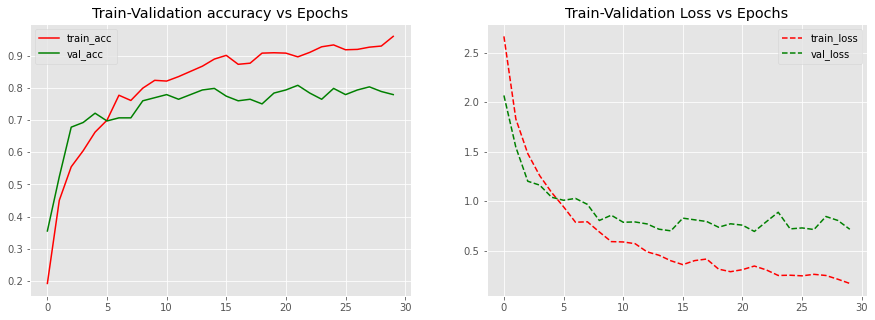

In [37]:
plot_performance(model_final.history)

**Observations:**

1. Overfitting is almost reduced.
2. Train loss is reducing smoothly as before.
3. Test loss is also reuducing gradually with some one-off spikes.

In [38]:
# Checking for the epochs with top 10 validation accuracy

log=pd.read_csv('training.log')
log['epoch']=log['epoch']+1
log.sort_values(by='val_accuracy',ascending=False).head(20)

epoch  accuracy      loss  val_accuracy  val_loss
20     21  0.905202  0.305047      0.822115  0.687999
27     28  0.914451  0.269305      0.812500  0.679228
22     23  0.923699  0.289661      0.812500  0.688919
29     30  0.926012  0.221798      0.807692  0.651189
25     26  0.914451  0.267191      0.807692  0.708995
21     22  0.924855  0.278285      0.807692  0.643701
24     25  0.927168  0.229924      0.798077  0.713993
18     19  0.899422  0.349322      0.798077  0.703908
12     13  0.853179  0.484402      0.793269  0.752031
19     20  0.893642  0.356799      0.793269  0.738070
15     16  0.892486  0.385701      0.793269  0.709445
11     12  0.848555  0.522104      0.788462  0.771421
23     24  0.922543  0.262930      0.788462  0.703423
13     14  0.861272  0.474875      0.788462  0.705868
14     15  0.876301  0.417652      0.783654  0.693300
17     18  0.884393  0.381093      0.783654  0.755076
8       9  0.790751  0.677163      0.778846  0.780039
28     29  0.939884  0.223223      0.774038  0.831010
16     17  0.883237  0.356666      0.774038  0.717300
10     11  0.848555  0.534172      0.774038  0.767085

In [39]:
# Model the model with the highest val_accuracy

mod=load_model('best_model.h5')

## 4. Visualize the predictions

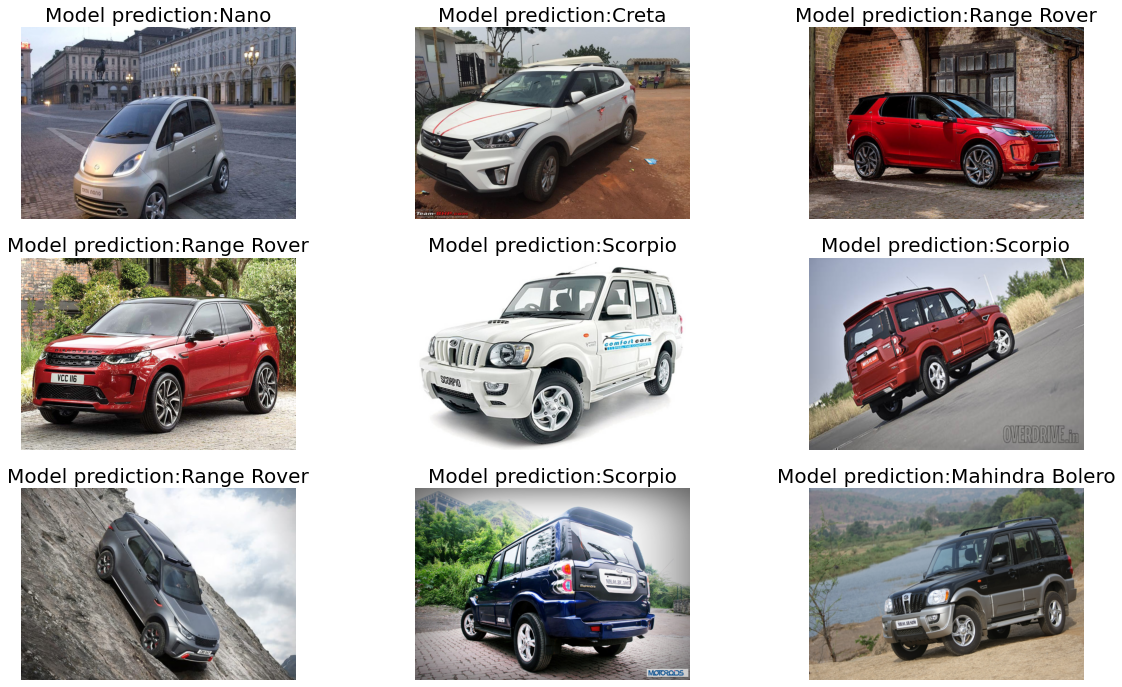

In [44]:
rcParams['figure.figsize']=(20,12)
import random
for i,j in enumerate(random.sample(range(1,24),9)):   
    try:
        img_test_path=f'C:\\Users\\Kishore1\\Downloads\\Indian Cars\\Test_images\\img{j}.png'
    except:
        img_test_path=f'C:\\Users\Kishore1\\Downloads\\Indain Cars\\Test_images\\img{j}.jpeg'
    #print(img_test_path)
    

    img=image.load_img(img_test_path,target_size=(224,224))
    img_ar=image.img_to_array(img)
    img_ar_ex=np.expand_dims(img_ar,axis=0)
    img_p=tf.keras.applications.mobilenet.preprocess_input(img_ar_ex)

    pred=mod.predict_classes(img_p)

    def predict_car(pred=pred):
        for i,j in train_data.class_indices.items():
            if pred==j:
                return f"Model prediction:{i}"
            
    plt.subplot(3,3,i+1)
    plt.grid(False)
    plt.axis('off')
    plt.title(predict_car(),{'fontsize': 20,'color':'black'})
    img=cv2.imread(img_test_path)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img ,(1000,700))
    plt.imshow(img)


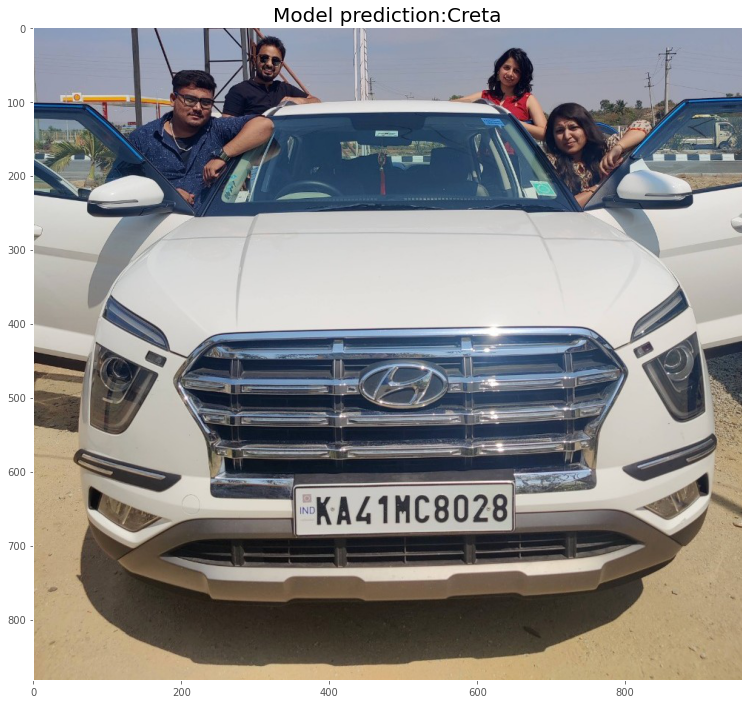

In [45]:
img_test_path=f'C:\\Users\Kishore1\\Downloads\\Indian Cars\\Test_images\\img24.png'
img=image.load_img(img_test_path,target_size=(224,224))
img_ar=image.img_to_array(img)
img_ar_ex=np.expand_dims(img_ar,axis=0)
img_p=tf.keras.applications.mobilenet.preprocess_input(img_ar_ex)

pred=mod.predict_classes(img_p)

def predict_car(pred=pred):
    for i,j in train_data.class_indices.items():
        if pred==j:
            return f"Model prediction:{i}"


plt.grid(False)
plt.title(predict_car(),{'fontsize': 20,'color':'black'})
img=cv2.imread(img_test_path)
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img ,(959,882))
plt.imshow(img)


## 5. Analysis of the accuracy and loss of all the models built

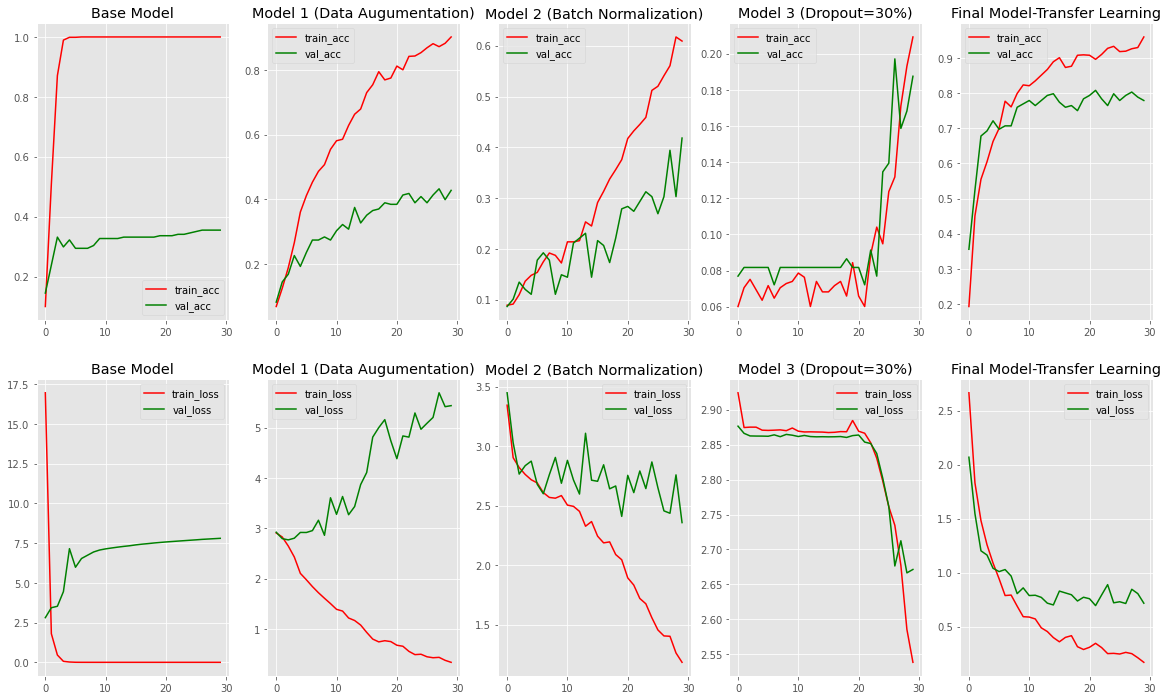

In [46]:
plt.style.use('ggplot')
rcParams['figure.figsize']=(20,12)
plt.subplot(2,5,1)
plt.plot(model.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Base Model')
plt.legend()

plt.subplot(2,5,2)
plt.plot(model1.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model1.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Model 1 (Data Augumentation)')
plt.legend()

plt.subplot(2,5,3)
plt.plot(model2.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model2.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Model 2 (Batch Normalization)')
plt.legend()

plt.subplot(2,5,4)
plt.plot(model3.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model3.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Model 3 (Dropout=30%)')
plt.legend()

plt.subplot(2,5,5)
plt.plot(model_final.history.history['accuracy'], 'r', label='train_acc')
plt.plot(model_final.history.history['val_accuracy'], 'g', label='val_acc')
plt.title('Final Model-Transfer Learning')
plt.legend()

plt.subplot(2,5,6)
plt.plot(model.history.history['loss'], 'r', label='train_loss')
plt.plot(model.history.history['val_loss'], 'g', label='val_loss')
plt.title('Base Model')
plt.legend()

plt.subplot(2,5,7)
plt.plot(model1.history.history['loss'], 'r', label='train_loss')
plt.plot(model1.history.history['val_loss'], 'g', label='val_loss')
plt.title('Model 1 (Data Augumentation)')
plt.legend()

plt.subplot(2,5,8)
plt.plot(model2.history.history['loss'], 'r', label='train_loss')
plt.plot(model2.history.history['val_loss'], 'g', label='val_loss')
plt.title('Model 2 (Batch Normalization)')
plt.legend()

plt.subplot(2,5,9)
plt.plot(model3.history.history['loss'], 'r', label='train_loss')
plt.plot(model3.history.history['val_loss'], 'g', label='val_loss')
plt.title('Model 3 (Dropout=30%)')
plt.legend()

plt.subplot(2,5,10)
plt.plot(model_final.history.history['loss'], 'r', label='train_loss')
plt.plot(model_final.history.history['val_loss'], 'g', label='val_loss')
plt.title('Final Model-Transfer Learning')
plt.legend()
plt.show()

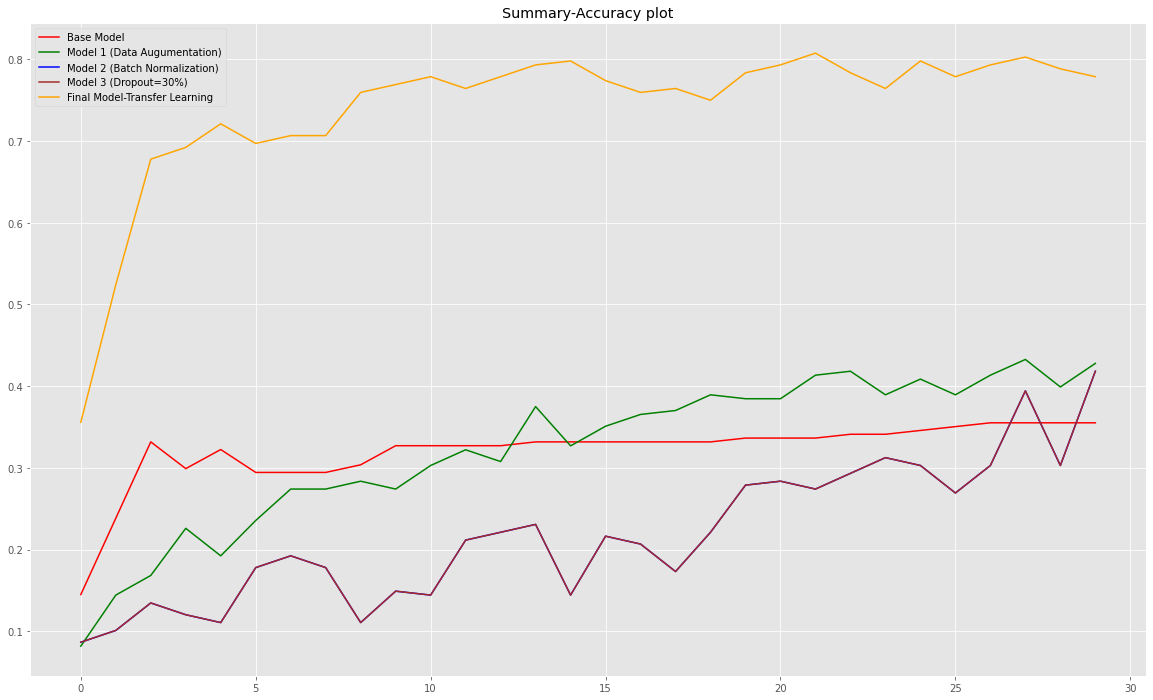

In [47]:
rcParams['figure.figsize']=(20,12)
plt.plot(model.history.history['val_accuracy'], 'r', label='val_acc')
plt.plot(model1.history.history['val_accuracy'], 'g', label='val_acc')
plt.plot(model2.history.history['val_accuracy'], 'b', label='val_acc')
plt.plot(model2.history.history['val_accuracy'], 'brown', label='val_acc')
plt.plot(model_final.history.history['val_accuracy'], 'orange', label='val_acc')
plt.legend(['Base Model','Model 1 (Data Augumentation)','Model 2 (Batch Normalization)','Model 3 (Dropout=30%)','Final Model-Transfer Learning'])
plt.title("Summary-Accuracy plot")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install gradio

In [48]:
model_load=load_model('best_model.h5')
def prediction(image):
    image = image.reshape((1, 224, 224, 3))
    image=tf.keras.applications.mobilenet.preprocess_input(image)
    prediction = model_load.predict(image).flatten()
    return {class_names[i]: float(prediction[i]) for i in range(18)}

In [ ]:
# Use predefined input and output objects from gradio
image1 = gr.inputs.Image(shape=(224,224))
label1 = gr.outputs.Label(num_top_classes=18)

# Gradio interface to input an image and see its prediction with percentage confidence
gr.Interface(fn=prediction, inputs=image1, outputs=label1,
             #theme="huggingface",
             title="CLASSIFICATION OF CAR MODELS USING CONVOLUTIONAL NEURAL NETWORK",
             description =" Select an image and hit submit to see its classification",
             allow_flagging=False,
             layout="vertical",
             live=True,
             capture_session=True,
             interpretation='default').launch(debug='True',share=True)